In [1]:
import numpy as np
import choix
import opt_fair
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from matplotlib import colors

In [2]:
size = 100 #number of items
min_size = 30 
maj_size = size - min_size
num_reviewers = 50 #number of reviewers
pair_per_reviewer = 100 #number of pairs evaluated per reviewer

In [3]:
#original[0:(maj_size)] = original[0:(maj_size)] - np.mean(original[0:(maj_size)])
#original[(maj_size):size] = original[(maj_size):size] - np.mean(original[(maj_size):size])

classes = [0] * maj_size + [1] * min_size

In [22]:
%%time
np.random.seed(42)
max_iters = 100
std = [0.5,1,2,5,10,20,50, 100]
annot_bt_all_normal = []



# Repeat the code 5 times
for repeat in range(5):
    annot_bt = np.zeros(len(std))

    for i,val in enumerate(std):
        #data for all

        original = np.random.normal(0,val ,size = size)

        #data for reviewers
        revs_bias = [val/10]*num_reviewers #10% of the std
        #revs_bias = [0]*num_reviewers
        biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
        revs_set =  opt_fair._create_pc_set_for_reviewers(biased_scores,pair_per_reviewer)

        #estimation
        pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
        annot_bt_temp,annot_bias =  opt_fair._alternate_optim(size, num_reviewers, pc_with_revs, iters = max_iters)
        
        annot_bt[i],x = stats.kendalltau(annot_bt_temp,original)
        print(val, annot_bt[i])
    # Add the results to the list
    annot_bt_all_normal.append(annot_bt)



0.5 0.728888888888889
1 0.8626262626262627
2 0.9002020202020203
5 0.9179797979797981
10 0.9236363636363638
20 0.9515151515151516
50 0.9515151515151516
100 0.9119191919191921
0.5 0.7393939393939396
1 0.8464646464646466
2 0.9107070707070708
5 0.9272727272727275
10 0.9523232323232325
20 0.9604040404040406
50 0.9672727272727274
100 0.9600000000000002
0.5 0.7002020202020204
1 0.8622222222222223
2 0.8767676767676769
5 0.945858585858586
10 0.9042424242424244
20 0.9357575757575758
50 0.9470707070707072
100 0.9797979797979799
0.5 0.717979797979798
1 0.8614141414141415
2 0.9070707070707072
5 0.8593939393939395
10 0.9664646464646466
20 0.9321212121212122
50 0.9672727272727274
100 0.9414141414141415
0.5 0.7195959595959597
1 0.8719191919191921
2 0.9030303030303031
5 0.9127272727272728
10 0.945858585858586
20 0.9668686868686871
50 0.9753535353535355
100 0.9454545454545457
CPU times: total: 29min 28s
Wall time: 16min 1s


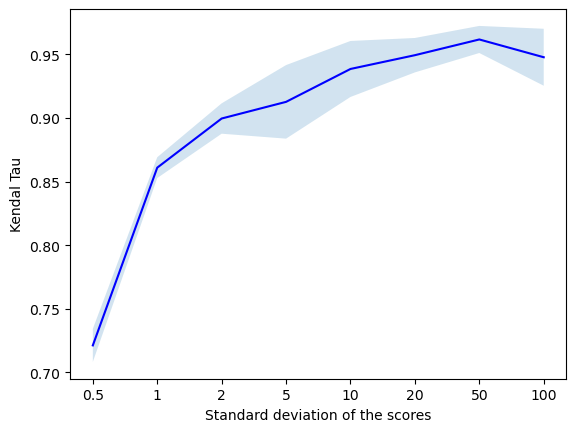

In [24]:
# Compute the mean and standard deviation across the 5 repetitions
mean_annot_bt = np.mean(annot_bt_all_normal, axis=0)
std_annot_bt = np.std(annot_bt_all_normal, axis=0)

# Plot the mean and standard deviation
plt.xticks(range(len(ranges)), [i for i in ranges])
plt.plot(mean_annot_bt, 'b')
plt.fill_between(range(len(ranges)), mean_annot_bt - std_annot_bt, mean_annot_bt + std_annot_bt, alpha=0.2)
# Add axis labels
plt.xlabel('Standard deviation of the scores')
plt.ylabel('Kendal Tau')
# Add a title
#plt.title('Ranking accuracy and range of the scores')
#plt.legend(['Our method'])
# Display the plot
plt.show()

In [4]:
%%time

np.random.seed(42)
max_iters = 100
std = [0.5, 1, 2, 5, 10, 20, 50, 100]
revs_bias_values = [[0]*num_reviewers, [1]*num_reviewers, [1/5]*num_reviewers, [1]*num_reviewers]
annot_bt_all_normal = []

for ww,revs_bias in enumerate(revs_bias_values):
        annot_bt_normal = []
        # Repeat the code 5 times
        for repeat in range(5):
            annot_bt = np.zeros(len(std))

            for i, val in enumerate(std):
                # data for all
                original = np.random.normal(0, val, size=size)


                # data for reviewers
                if ww == 0 or ww == 1:
                    biased_scores = opt_fair._create_matrix_biased_scores(original, revs_bias, classes)
                if ww == 2 or ww == 3:
                    biased_scores = opt_fair._create_matrix_biased_scores(original, [x * val for x in revs_bias], classes)
                revs_set =  opt_fair._create_pc_set_for_reviewers(biased_scores, pair_per_reviewer)

                # estimation
                pc_with_revs = opt_fair.Pairwise_with_rev(data=revs_set, penalty=0, classes=classes)
                annot_bt_temp, annot_bias =  opt_fair._alternate_optim(size, num_reviewers, pc_with_revs, iters=max_iters)

                annot_bt[i], x = stats.kendalltau(annot_bt_temp, original)
                print(revs_bias[0], repeat, val, annot_bt[i])

            # Add the results to the list
            annot_bt_normal.append(annot_bt)
            
        annot_bt_all_normal.append(annot_bt_normal)
        


0 0 0.5 0.7296969696969698
0 0 1 0.8573737373737375
0 0 2 0.8973737373737376
0 0 5 0.9208080808080809
0 0 10 0.9127272727272728
0 0 20 0.9410101010101012
0 0 50 0.9563636363636364
0 0 100 0.9321212121212122
0 1 0.5 0.7353535353535354
0 1 1 0.8484848484848486
0 1 2 0.9082828282828285
0 1 5 0.924848484848485
0 1 10 0.950707070707071
0 1 20 0.9591919191919194
0 1 50 0.9696969696969698
0 1 100 0.9705050505050506
0 2 0.5 0.7034343434343435
0 2 1 0.8565656565656566
0 2 2 0.8852525252525254
0 2 5 0.945858585858586
0 2 10 0.8901010101010103
0 2 20 0.9276767676767678
0 2 50 0.9385858585858587
0 2 100 0.9785858585858588
0 3 0.5 0.7167676767676769
0 3 1 0.8557575757575759
0 3 2 0.9050505050505052
0 3 5 0.8565656565656566
0 3 10 0.9668686868686871
0 3 20 0.9175757575757576
0 3 50 0.9733333333333334
0 3 100 0.9414141414141415
0 4 0.5 0.7191919191919193
0 4 1 0.8723232323232325
0 4 2 0.9086868686868688
0 4 5 0.9074747474747475
0 4 10 0.9313131313131315
0 4 20 0.9753535353535355
0 4 50 0.978181818181

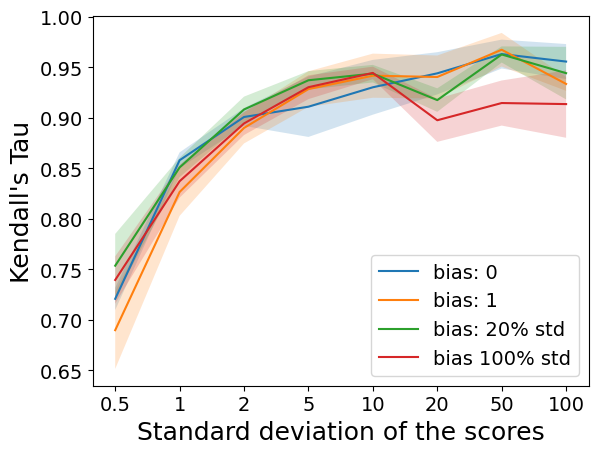

In [7]:
line_objects = []  # List to store line objects

for ww, revs_bias in enumerate(revs_bias_values):

    # Compute the mean and standard deviation across the repetitions
    mean_annot_bt = np.mean(annot_bt_all_normal[ww], axis=0)
    std_annot_bt = np.std(annot_bt_all_normal[ww], axis=0)

    # Plot the mean and standard deviation
    plt.xticks(range(len(std)), [str(val) for val in std])
    line, = plt.plot(mean_annot_bt)  # Store the line object
    plt.fill_between(range(len(std)), mean_annot_bt - std_annot_bt, mean_annot_bt + std_annot_bt, alpha=0.2)
    line_objects.append(line)  # Add the line object to the list

# Create the legend using the line objects and revs_bias values
legend_labels = ['bias: 0', 'bias: 1','bias: 20% std', 'bias 100% std' ]
plt.legend(line_objects, legend_labels, fontsize=14)

# Add axis labels and title
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Standard deviation of the scores', fontsize=18)
plt.ylabel("Kendall's Tau", fontsize=18)
#plt.title('Ranking accuracy and range of the scores')


plt.savefig("../plots/scores_ranges_normal.pdf", bbox_inches="tight")
# Display the plot
plt.show()